# ARTIFICIAL NEURAL NETWORKS USING KERAS

## PERCEPTRON

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()
X, y = iris['data'][:, 2:4], (iris['target'] == 0).astype(np.int)

In [3]:
per_clf = Perceptron()
per_clf.fit(X,y)
y_pred = per_clf.predict([[2, 0.5]])

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


## THE MULTILAYER PERCEPTRON AND BACKPROPAGATION

In [4]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'1.13.1'

In [5]:
keras.__version__

'2.2.4-tf'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

### Creating a model using a Sequential API

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
                                ])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]

In [16]:
hidden1.name

'dense_3'

In [18]:
model.get_layer('dense_3') is hidden1

True

In [19]:
weights, biases = hidden1.get_weights()

In [20]:
weights

array([[ 0.07231587,  0.02731961,  0.00723688, ...,  0.02036293,
         0.05672796,  0.0354692 ],
       [ 0.00224329, -0.05610041,  0.07289746, ...,  0.04487742,
        -0.01432406, -0.01124718],
       [-0.04038148, -0.02401203, -0.00245373, ..., -0.03482636,
         0.0183138 , -0.07187168],
       ...,
       [-0.02219417, -0.00185183, -0.01177871, ...,  0.02685352,
        -0.00856587, -0.04267941],
       [-0.02888058,  0.06937274,  0.06632283, ..., -0.07084358,
         0.04472151,  0.06840907],
       [-0.04858609, -0.02442061, -0.03712231, ...,  0.06978048,
         0.07049283,  0.04408435]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
biases.shape

(300,)

### Compiling the model

In [24]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

### Training and evaluating the model

In [25]:
history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 23s 417us/sample - loss: 0.7381 - acc: 0.7583 - val_loss: 0.5070 - val_acc: 0.8290
Epoch 2/30
55000/55000 [==============================] - 22s 395us/sample - loss: 0.4936 - acc: 0.8282 - val_loss: 0.4594 - val_acc: 0.8418
Epoch 3/30
55000/55000 [==============================] - 21s 390us/sample - loss: 0.4492 - acc: 0.8433 - val_loss: 0.4344 - val_acc: 0.8450
Epoch 4/30
55000/55000 [==============================] - 22s 393us/sample - loss: 0.4212 - acc: 0.8533 - val_loss: 0.4039 - val_acc: 0.8622
Epoch 5/30
55000/55000 [==============================] - 21s 388us/sample - loss: 0.4018 - acc: 0.8597 - val_loss: 0.3824 - val_acc: 0.8720
Epoch 6/30
55000/55000 [==============================] - 22s 397us/sample - loss: 0.3857 - acc: 0.8645 - val_loss: 0.3769 - val_acc: 0.8722
Epoch 7/30
55000/55000 [==============================] - 21s 387us/sample - loss: 0.3723 - acc: 0.8689 -

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

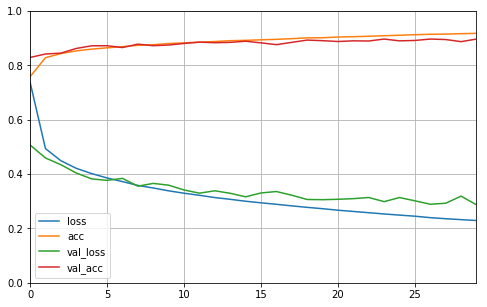

In [27]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 167us/sample - loss: 2.4113 - acc: 0.8480


[2.411330233192442, 0.848]

### Using the model to make predictions

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [31]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [32]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)